# Data Mining

Data mining is the process of discovering interesting patterns and knowledge from large amounts of data.

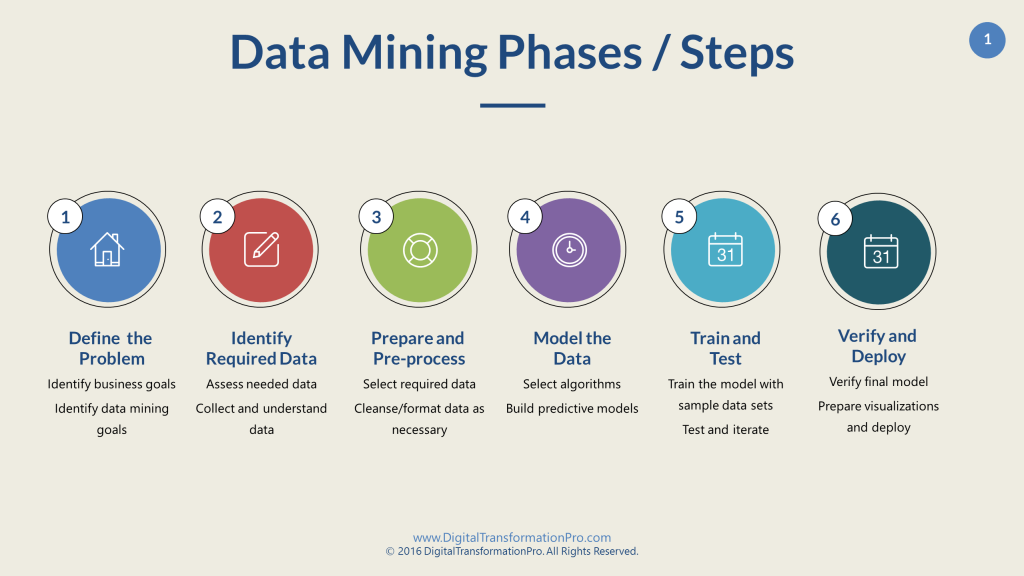

# Data Preprocessing
# What is it ?

1. Data Cleaning (to remove noise and inconsistent data)
2. Data Integration (where multiple data sources may be combined)
3. Data Selection (where data relevant to the analysis task are retrieved from the database)
4. Data Transformation (where data are transformed and consolidated into forms appropriate for mining by performing summary or aggregation operations)

# Why do it ?

Data can be :
    1. Incomplete
    2. Inaccurate or Noisy
    3. Inconsistent

***

# Exploratory Data Analysis (EDA)

In [132]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [133]:
df = sns.load_dataset('iris') #Loads the Iris dataset available within the seaborn library into a DataFrame

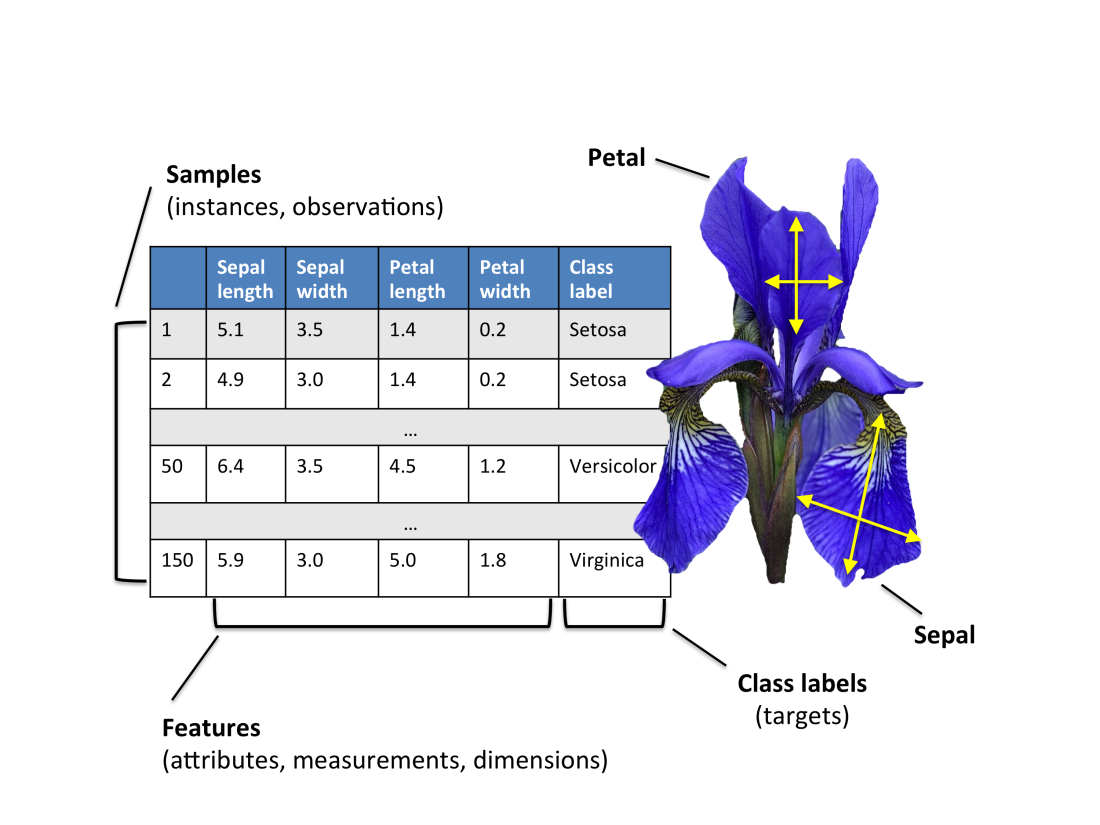

In [134]:
df.shape # Contains 150 rows and 5 features

(150, 5)

In [135]:
df.head() # Target feature is 'species'

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [137]:
df.describe() # Provides a statistical summary of the dataset

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [138]:
df.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [139]:
df.species.value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

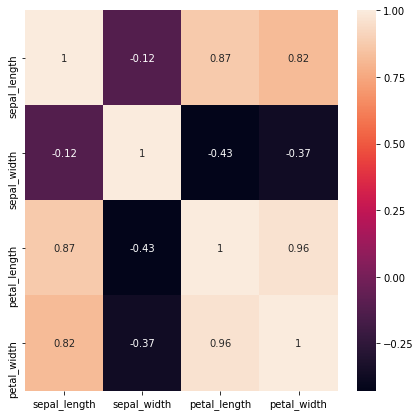

In [140]:
plt.figure(figsize=(7,7))
ax=sns.heatmap(data=df.corr(),annot=True) # The correlation between different attributes can be visualised

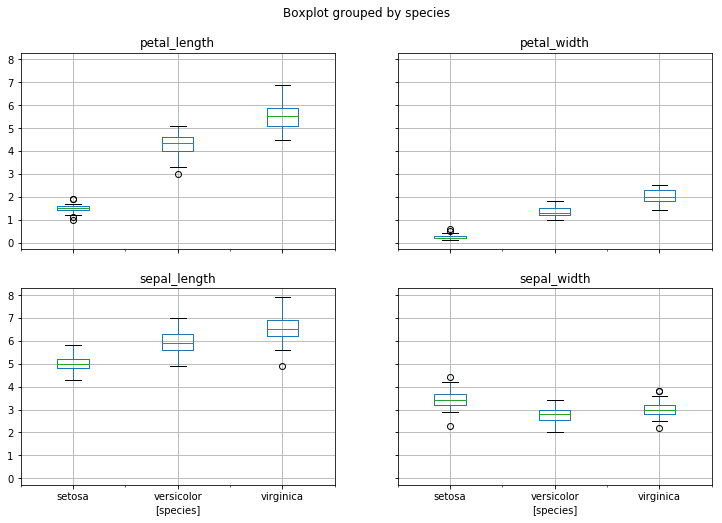

In [141]:
df.boxplot(by='species',figsize=(12,8)); # Outliers can be identified

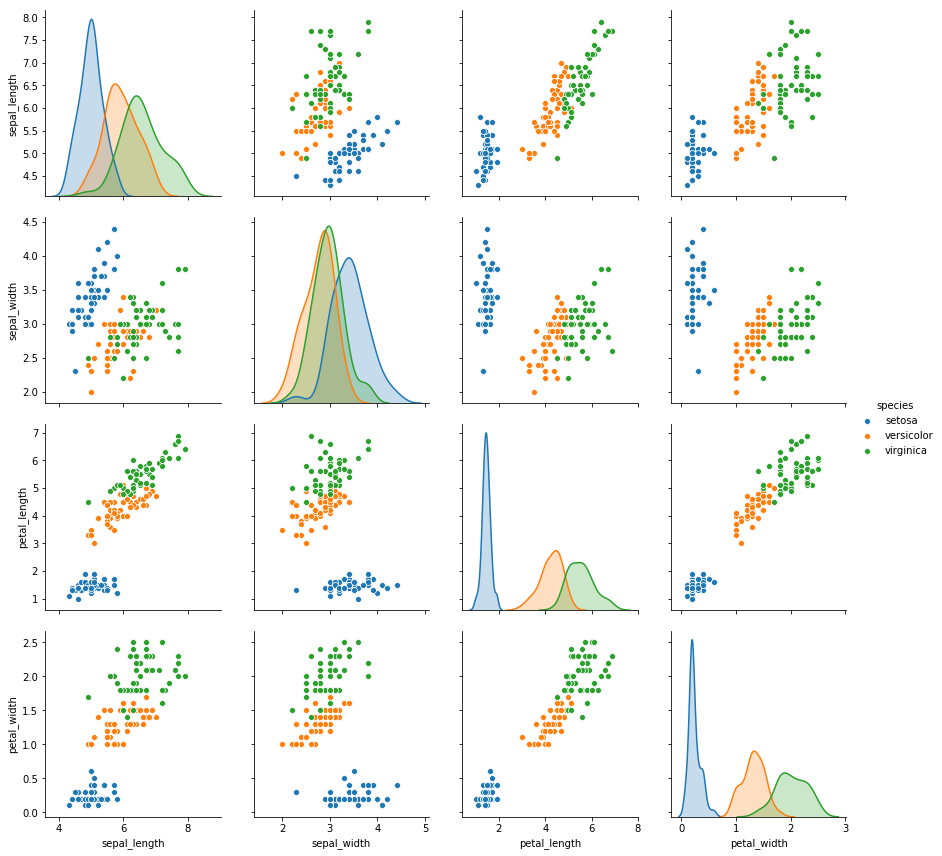

In [142]:
sns.pairplot(df,hue='species',height=3,aspect=1);

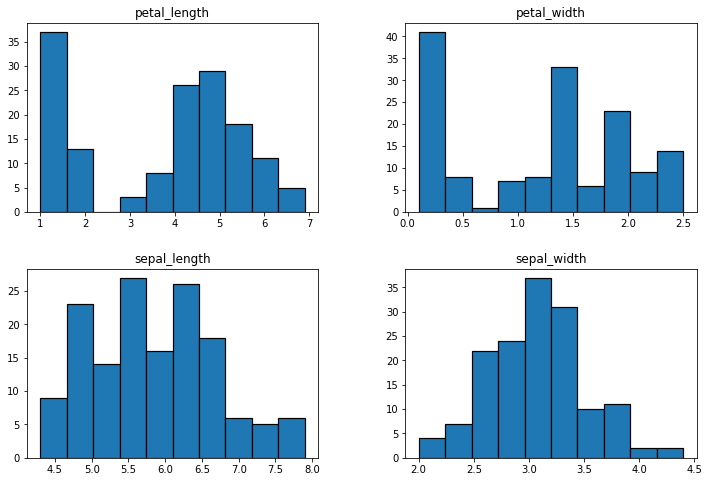

In [143]:
df.hist(edgecolor='black',linewidth=1.2,figsize=(12,8),grid=False)
plt.show();

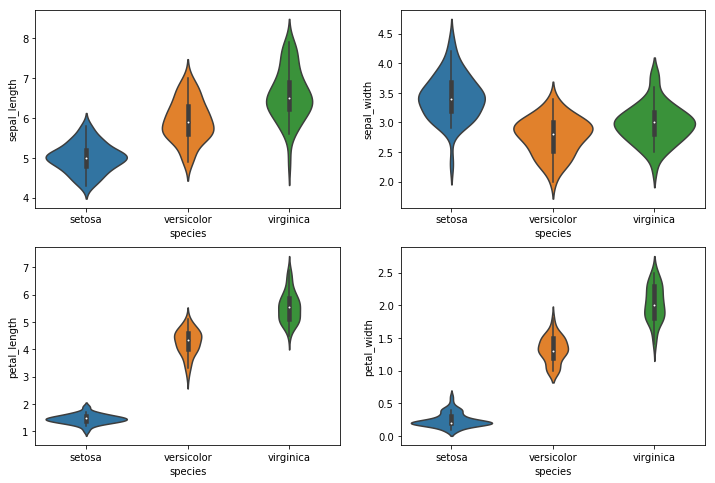

In [144]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='sepal_length',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='sepal_width',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='petal_length',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='petal_width',data=df);

***

# Data Cleaning

In [145]:
df = pd.read_csv('titanic.csv') # Loads the titanic dataset into a DataFrame

In [146]:
df.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [147]:
df.info() # 'Age' , 'Cabin' and 'Embarked' contain null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


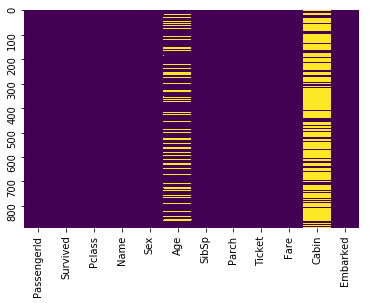

In [148]:
sns.heatmap(df.isnull(),yticklabels=100,cbar=False,cmap='viridis') # Null values are seen as the yellow dashed lines

In [149]:
df = df.dropna() # Deletes all the rows with null value for atleast 1 attribute

In [150]:
df.info() # The total number of tuples reduces drastically

<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 12 columns):
PassengerId    183 non-null int64
Survived       183 non-null int64
Pclass         183 non-null int64
Name           183 non-null object
Sex            183 non-null object
Age            183 non-null float64
SibSp          183 non-null int64
Parch          183 non-null int64
Ticket         183 non-null object
Fare           183 non-null float64
Cabin          183 non-null object
Embarked       183 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB


In [151]:
df = pd.read_csv('titanic.csv') 

In [152]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [153]:
df = df.fillna(method='bfill') # Fills each null value with the value in the previous tuple, try 'ffill'.

In [154]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C123,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,E46,S


In [155]:
df = pd.read_csv('titanic.csv')

In [156]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


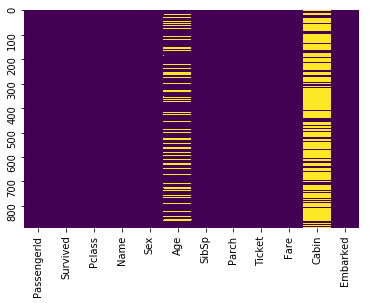

In [157]:
sns.heatmap(df.isnull(),yticklabels=100,cbar=False,cmap='viridis')

In [158]:
df.Age.fillna(df.Age.mean(),inplace=True) # Null values in the 'Age' attribute are replaced by the mean age.

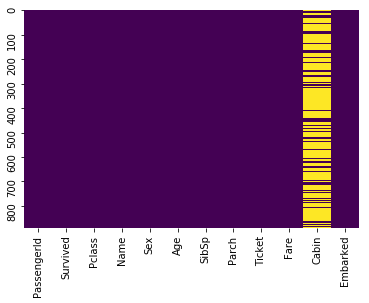

In [159]:
sns.heatmap(df.isnull(),yticklabels=100,cbar=False,cmap='viridis')

In [160]:
df.Cabin.mode() # Mode values of 'Cabin' attribute are returned

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [161]:
df.Cabin.fillna('B96',inplace=True) # Null values in the 'Cabin' attribute are replaced by 'B96'

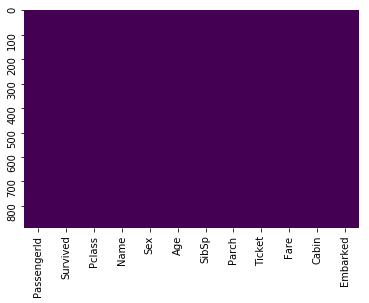

In [162]:
sns.heatmap(df.isnull(),yticklabels=100,cbar=False,cmap='viridis')

In [163]:
df = pd.read_csv('wine.csv') # Loads the standard wine dataset
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [164]:
df.shape

(178, 14)

In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
 Alcohol                        178 non-null float64
 Malic acid                     178 non-null float64
 Ash                            178 non-null float64
 Alcalinity of ash              178 non-null float64
 Magnesium                      178 non-null int64
 Total phenols                  178 non-null float64
 Flavanoids                     178 non-null float64
 Nonflavanoid phenols           178 non-null float64
 Proanthocyanins                178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


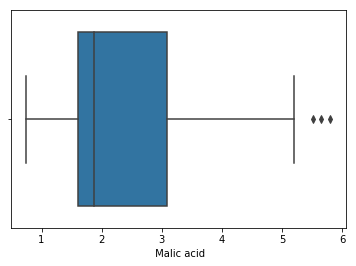

In [166]:
sns.boxplot(x=df[' Malic acid']) # Outliers for the 'Malic acid' attribute can be identified 

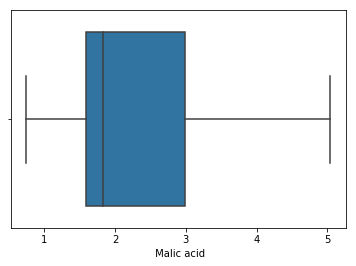

In [167]:
df.drop(df[df[' Malic acid']>5.1].index,inplace=True) # Deletes the outliers
sns.boxplot(x=df[' Malic acid'])

***

# Data Transformation

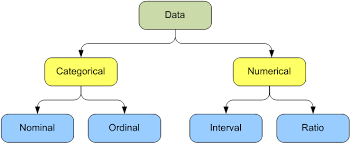

In [168]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
dummies = []
cols = ['Pclass', 'Sex', 'Embarked']
for col in cols:
    dummies.append(pd.get_dummies(df[col])) # Categorical attributes are converted to numerical 

In [170]:
titanic_dummies = pd.concat(dummies, axis=1)

In [171]:
df = pd.concat((df,titanic_dummies), axis=1)

In [172]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1,0,1,0,0,1


In [173]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 20 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
1              891 non-null uint8
2              891 non-null uint8
3              891 non-null uint8
female         891 non-null uint8
male           891 non-null uint8
C              891 non-null uint8
Q              891 non-null uint8
S              891 non-null uint8
dtypes: float64(2), int64(5), object(5), uint8(8)
memory usage: 90.6+ KB


In [174]:
cols = ['Age','Fare'] # Select numerical attributes for transformation

In [175]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [176]:
df[cols] = MinMaxScaler().fit_transform(df[cols])

In [177]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,0.271174,1,0,A/5 21171,0.014151,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.472229,1,0,PC 17599,0.139136,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,0.321438,0,0,STON/O2. 3101282,0.015469,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.434531,1,0,113803,0.103644,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.434531,0,0,373450,0.015713,NaN,S,0,0,1,0,1,0,0,1


In [178]:
df[cols] = StandardScaler().fit_transform(df[cols])

In [179]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,1,2,3,female,male,C,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.530377,1,0,A/5 21171,-0.502445,NaN,S,0,0,1,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.571831,1,0,PC 17599,0.786845,C85,C,1,0,0,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.254825,0,0,STON/O2. 3101282,-0.488854,NaN,S,0,0,1,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.365167,1,0,113803,0.420730,C123,S,1,0,0,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.365167,0,0,373450,-0.486337,NaN,S,0,0,1,0,1,0,0,1


***

# Data Reduction
Dimensionality Reduction by Principal Component Analysis (PCA)

In [180]:
df = pd.read_csv('wine.csv')
df.shape

(178, 14)

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
class                           178 non-null int64
 Alcohol                        178 non-null float64
 Malic acid                     178 non-null float64
 Ash                            178 non-null float64
 Alcalinity of ash              178 non-null float64
 Magnesium                      178 non-null int64
 Total phenols                  178 non-null float64
 Flavanoids                     178 non-null float64
 Nonflavanoid phenols           178 non-null float64
 Proanthocyanins                178 non-null float64
Color intensity                 178 non-null float64
Hue                             178 non-null float64
OD280/OD315 of diluted wines    178 non-null float64
Proline                         178 non-null int64
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [182]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [183]:
X = df.iloc[:, 1:]

In [184]:
X_scaled = StandardScaler().fit_transform(X) # Normalization should be done before applying PCA

In [185]:
from sklearn.decomposition import PCA

In [186]:
pca = PCA(n_components=None)

In [187]:
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [188]:
pca.explained_variance_ratio_

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [189]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338, 0.66529969, 0.73598999, 0.80162293,
       0.85098116, 0.89336795, 0.92017544, 0.94239698, 0.96169717,
       0.97906553, 0.99204785, 1.        ])

In [190]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.362 0.192 0.111 0.071 0.066 0.049 0.042 0.027 0.022 0.019 0.017 0.013
 0.008]


In [191]:
pd.DataFrame(np.round(pca.components_, 3), columns=X.columns).T # displays the principal components and the 
#contribution of each feature

,0,1,2,3,4,5,6,7,8,9,10,11,12
Alcohol,0.144,-0.484,-0.207,-0.018,-0.266,-0.214,-0.056,-0.396,0.509,0.212,-0.226,-0.266,0.015
Malic acid,-0.245,-0.225,0.089,0.537,0.035,-0.537,0.421,-0.066,-0.075,-0.309,0.076,0.122,0.026
Ash,-0.002,-0.316,0.626,-0.214,-0.143,-0.154,-0.149,0.170,-0.308,-0.027,-0.499,-0.050,-0.141
Alcalinity of ash,-0.239,0.011,0.612,0.061,0.066,0.101,-0.287,-0.428,0.200,0.053,0.479,-0.056,0.092
Magnesium,0.142,-0.300,0.131,-0.352,0.727,-0.038,0.323,0.156,0.271,0.068,0.071,0.062,0.057
Total phenols,0.395,-0.065,0.146,0.198,-0.149,0.084,-0.028,0.406,0.286,-0.320,0.304,-0.304,-0.464
Flavanoids,0.423,0.003,0.151,0.152,-0.109,0.019,-0.061,0.187,0.050,-0.163,-0.026,-0.043,0.832
Nonflavanoid phenols,-0.299,-0.029,0.170,-0.203,-0.501,0.259,0.595,0.233,0.196,0.216,0.117,0.042,0.114
Proanthocyanins,0.313,-0.039,0.149,0.399,0.137,0.534,0.372,-0.368,-0.209,0.134,-0.237,-0.096,-0.117
Color intensity,-0.089,-0.530,-0.137,0.066,-0.076,0.419,-0.228,0.034,0.056,-0.291,0.032,0.604,-0.012


In [192]:
pca = PCA(n_components=2) # 2 components are selected to explain the data with a variance of 

In [193]:
X_transformed = pca.fit_transform(X_scaled)

In [194]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.362 0.192]


In [195]:
np.cumsum(pca.explained_variance_ratio_)

array([0.36198848, 0.55406338])

In [196]:
X_transformed.shape

(178, 2)

In [197]:
df = pd.DataFrame(X_transformed,columns=['feature_1','feature_2']) 
df.head() # returns the transformed dataset

,feature_1,feature_2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831


***